In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import random


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Create a df to lat, lon 
column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

In [2]:
# Randomly generate a list of 1750 cities. Use 50 to test for duplicates.
for x in range(1750):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      688
City       688
Country    688
dtype: int64

In [3]:
#Create a df to add all the data from the API calls.
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
clean_cities_df = pd.DataFrame(columns=column_names)

# Loop through the list of cities and add the data to the df.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        clean_cities_df.set_value(index, "City", city_data["name"])
        clean_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        clean_cities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        clean_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        clean_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        clean_cities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        clean_cities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        clean_cities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Data Retrieval


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

------------------------
Proceesing: City #  1  |  Port Alfred ZA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=port+alfred
------------------------
Proceesing: City #  2  |  Russell AR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=russell
City not found, skipping...
------------------------
Proceesing: City #  3  |  Bilimbay RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=bilimbay
------------------------
Proceesing: City #  4  |  Maizuru JP
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=maizuru
------------------------
Proceesing: City #  5  |  Qaanaaq GL
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=qaanaaq
City not found, skipping...
------------------------
Proceesing: City #  6  |  Acapulco MX
http:/

------------------------
Proceesing: City #  47  |  Kyshtovka RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=kyshtovka
City not found, skipping...
------------------------
Proceesing: City #  48  |  Mayo CA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=mayo
------------------------
Proceesing: City #  49  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=yellowknife
------------------------
Proceesing: City #  50  |  Mulege MX
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=mulege
City not found, skipping...
------------------------
Proceesing: City #  51  |  Kapit MY
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=kapit
------------------------
Proceesing: City #  52  |  Hobart AU
http://api.o

------------------------
Proceesing: City #  92  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=airai
------------------------
Proceesing: City #  93  |  Khatanga RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=khatanga
------------------------
Proceesing: City #  94  |  Victoria BN
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=victoria
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  95  |  Gallatin US
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=gallatin
City not found, skipping...
------------------------
Proceesing: City #  96  |  Bethel US
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=bethel
------------------------
Proceesing: City #  9

------------------------
Proceesing: City #  138  |  Taoudenni ML
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=taoudenni
------------------------
Proceesing: City #  139  |  Lebu ET
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=lebu
------------------------
Proceesing: City #  140  |  Almaznyy RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=almaznyy
------------------------
Proceesing: City #  141  |  East London ZA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=east+london
------------------------
Proceesing: City #  142  |  Cotonou BJ
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=cotonou
------------------------
Proceesing: City #  143  |  Lermontovka RU
http://api.openweathermap.org/data/2.5/weather?ap

------------------------
Proceesing: City #  186  |  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=arraial+do+cabo
------------------------
Proceesing: City #  187  |  Skibbereen IE
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=skibbereen
------------------------
Proceesing: City #  188  |  Avarua CK
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=avarua
------------------------
Proceesing: City #  189  |  Ponta Delgada PT
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=ponta+delgada
City not found, skipping...
------------------------
Proceesing: City #  190  |  Provideniya RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=provideniya
------------------------
Proceesing: City #  191  |  Karr

------------------------
Proceesing: City #  233  |  Lazaro Cardenas MX
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=lazaro+cardenas
------------------------
Proceesing: City #  234  |  Asyut EG
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=asyut
------------------------
Proceesing: City #  235  |  Sorong ID
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=sorong
------------------------
Proceesing: City #  236  |  Santa Cruz Cabralia BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=santa+cruz+cabralia
------------------------
Proceesing: City #  237  |  San Lorenzo PY
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=san+lorenzo
------------------------
Proceesing: City #  238  |  Balabac PH
http://api.openweat

------------------------
Proceesing: City #  280  |  Diamantina BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=diamantina
------------------------
Proceesing: City #  281  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=san+quintin
------------------------
Proceesing: City #  282  |  Jasper US
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=jasper
------------------------
Proceesing: City #  283  |  Fort Frances CA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=fort+frances
------------------------
Proceesing: City #  284  |  Tual ID
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=tual
------------------------
Proceesing: City #  285  |  Arlit NE
http://api.openweathermap.org/data/2.5/weather?

------------------------
Proceesing: City #  326  |  Maragogi BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=maragogi
------------------------
Proceesing: City #  327  |  Oussouye SN
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=oussouye
------------------------
Proceesing: City #  328  |  Broome GB
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=broome
------------------------
Proceesing: City #  329  |  Poya NC
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=poya
------------------------
Proceesing: City #  330  |  Lata IN
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=lata
------------------------
Proceesing: City #  331  |  Baherden TM
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49c

------------------------
Proceesing: City #  372  |  Corn Island NI
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=corn+island
------------------------
Proceesing: City #  373  |  Monte Alegre BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=monte+alegre
------------------------
Proceesing: City #  374  |  Ust-Kuyga RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=ust-kuyga
------------------------
Proceesing: City #  375  |  Meulaboh ID
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=meulaboh
------------------------
Proceesing: City #  376  |  Bonavista CA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=bonavista
City not found, skipping...
City not found, skipping...
City not found, skipping...
-------------

------------------------
Proceesing: City #  418  |  Machiques VE
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=machiques
------------------------
Proceesing: City #  419  |  Paamiut GL
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=paamiut
------------------------
Proceesing: City #  420  |  Kinablangan PH
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=kinablangan
------------------------
Proceesing: City #  421  |  Moose Factory CA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=moose+factory
------------------------
Proceesing: City #  422  |  Batouri CM
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=batouri
------------------------
Proceesing: City #  423  |  Port Lincoln AU
http://api.openweathermap.org/da

------------------------
Proceesing: City #  465  |  Verkhnyaya Inta RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=verkhnyaya+inta
------------------------
Proceesing: City #  466  |  Denton US
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=denton
------------------------
Proceesing: City #  467  |  Cockburn Town TC
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=cockburn+town
------------------------
Proceesing: City #  468  |  Okhotsk RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=okhotsk
------------------------
Proceesing: City #  469  |  Santa Maria da Boa Vista BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=santa+maria+da+boa+vista
City not found, skipping...
------------------------
Proceesing: 

------------------------
Proceesing: City #  511  |  Kamaishi JP
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=kamaishi
------------------------
Proceesing: City #  512  |  Adre TD
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=adre
------------------------
Proceesing: City #  513  |  Yurginskoye RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=yurginskoye
------------------------
Proceesing: City #  514  |  Wajir KE
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=wajir
------------------------
Proceesing: City #  515  |  Severo-Yeniseyskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=severo-yeniseyskiy
City not found, skipping...
------------------------
Proceesing: City #  516  |  Morant Bay JM
http://a

------------------------
Proceesing: City #  557  |  Liverpool GB
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=liverpool
------------------------
Proceesing: City #  558  |  Genhe CN
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=genhe
City not found, skipping...
------------------------
Proceesing: City #  559  |  Sturgis US
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=sturgis
City not found, skipping...
------------------------
Proceesing: City #  560  |  Novo Aripuana BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=novo+aripuana
------------------------
Proceesing: City #  561  |  Tazovskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=tazovskiy
------------------------
Proceesing: City #  562  |  

------------------------
Proceesing: City #  603  |  Neiafu TO
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=neiafu
------------------------
Proceesing: City #  604  |  Boa Vista BR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=boa+vista
City not found, skipping...
------------------------
Proceesing: City #  605  |  Formosa AR
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=formosa
------------------------
Proceesing: City #  606  |  At-Bashi KG
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=at-bashi
City not found, skipping...
------------------------
Proceesing: City #  607  |  Port-Gentil GA
http://api.openweathermap.org/data/2.5/weather?appid=f712ef5882d61e49ca5d4532d66916fa&units=IMPERIAL&q=port-gentil
City not found, skipping...
------------------------
Proc

In [4]:
#Reset the index
clean_cities_df = clean_cities_df.reset_index()
del clean_cities_df['index']
clean_cities_df.head(25)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Port Alfred,ZA,64.99,-33.59,26.89,84,8,1.01
1,Russell,AR,78.8,-33.01,-68.8,44,0,9.17
2,Bilimbay,RU,41,56.96,59.82,60,0,2.24
3,Maizuru,JP,48.45,35.47,135.35,68,0,2.37
4,Qaanaaq,GL,10.49,77.48,-69.36,84,68,11.43
5,Acapulco,MX,82.4,16.86,-99.88,74,40,4.7
6,Matagami,NG,83.03,9.67,8.4,53,48,2.37
7,Cayenne,GF,86,4.94,-52.33,66,75,17.22
8,Ushuaia,AR,38.48,-54.81,-68.31,65,90,23.04
9,Saint George,GR,56.25,39.45,22.34,62,75,4.7


In [5]:
# Save data to a CSV file
clean_cities_df.to_csv("City_Data.csv")


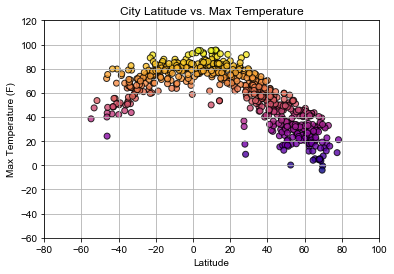

In [6]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Temperature (F)"], c=clean_cities_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("MeganKirby_Latitude_Temperature.png")

# Show plot
plt.show()


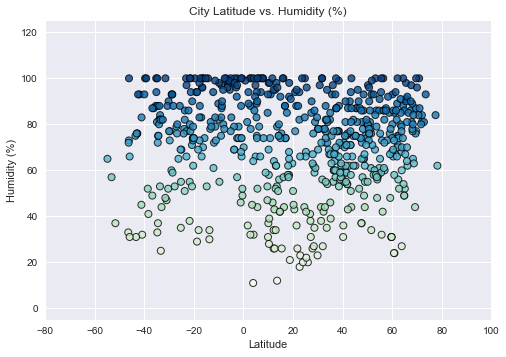

In [7]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Humidity (%)"], c=clean_cities_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("MeganKirby_Latitude_Humidity.png")

# Show plot
plt.show()

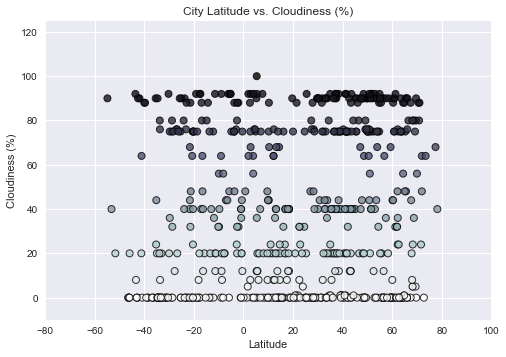

In [8]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("MeganKirby_Latitude_Cloudiness.png")

# Show plot
plt.show()

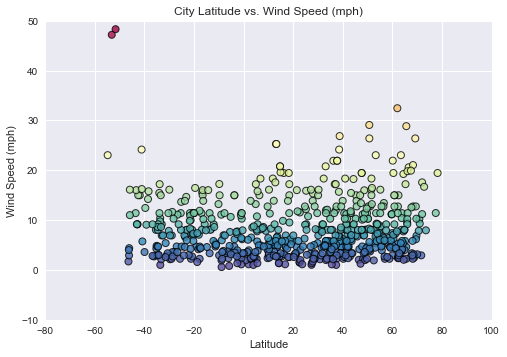

In [9]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Wind Speed (mph)"], c=clean_cities_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("MeganKirby_Latitude_WindSpeed.png")

# Show plot
plt.show()